In [93]:
#Throughout this document, things that can be changed by the user to investigate different 
#parts of the map are marked with #FINDME

# Import functions
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline

import eigencurves
import eigenmaps
import kmeans
import bin_eigenspectra
import os
import pdb
import spiderman as sp

import gen_lightcurves
import healpy as hp

import colorcet as cc
from colormap2d import generate_map2d
from matplotlib import colorbar, cm
from matplotlib.colors import BoundaryNorm, Normalize
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
p.rc('text', usetex=True)
p.rc('font', family='serif')

import run_higher_sph_harm
from eigensource import plot_utils

from importlib import import_module

import emcee
import corner

In [97]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 20
#rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

# Open MCMC output file

In [246]:
# Specifify output file
#output_file = "data/sph_harmonic_coefficients_full_samples/quadspike/spherearray_deg_2.npz"
output_file = "spherearray_deg_2.npz"

In [247]:
# Extract array 
file = np.load(output_file, encoding='latin1')
print(file.files)
arr_0 = file["arr_0"]

['arr_0']


In [248]:
# Get wavelength array and spherical harmonic coeffs
wl = arr_0.all()["wavelength (um)"]
sph = arr_0.all()["spherical coefficients"]

In [249]:
# Think about the array dimensions 
print(wl.shape)
print(sph.shape)

(10,)
(25600, 4, 10)


# Trace plot

Plot a trace of an MCMC parameter as a function of iteration for each wavelength

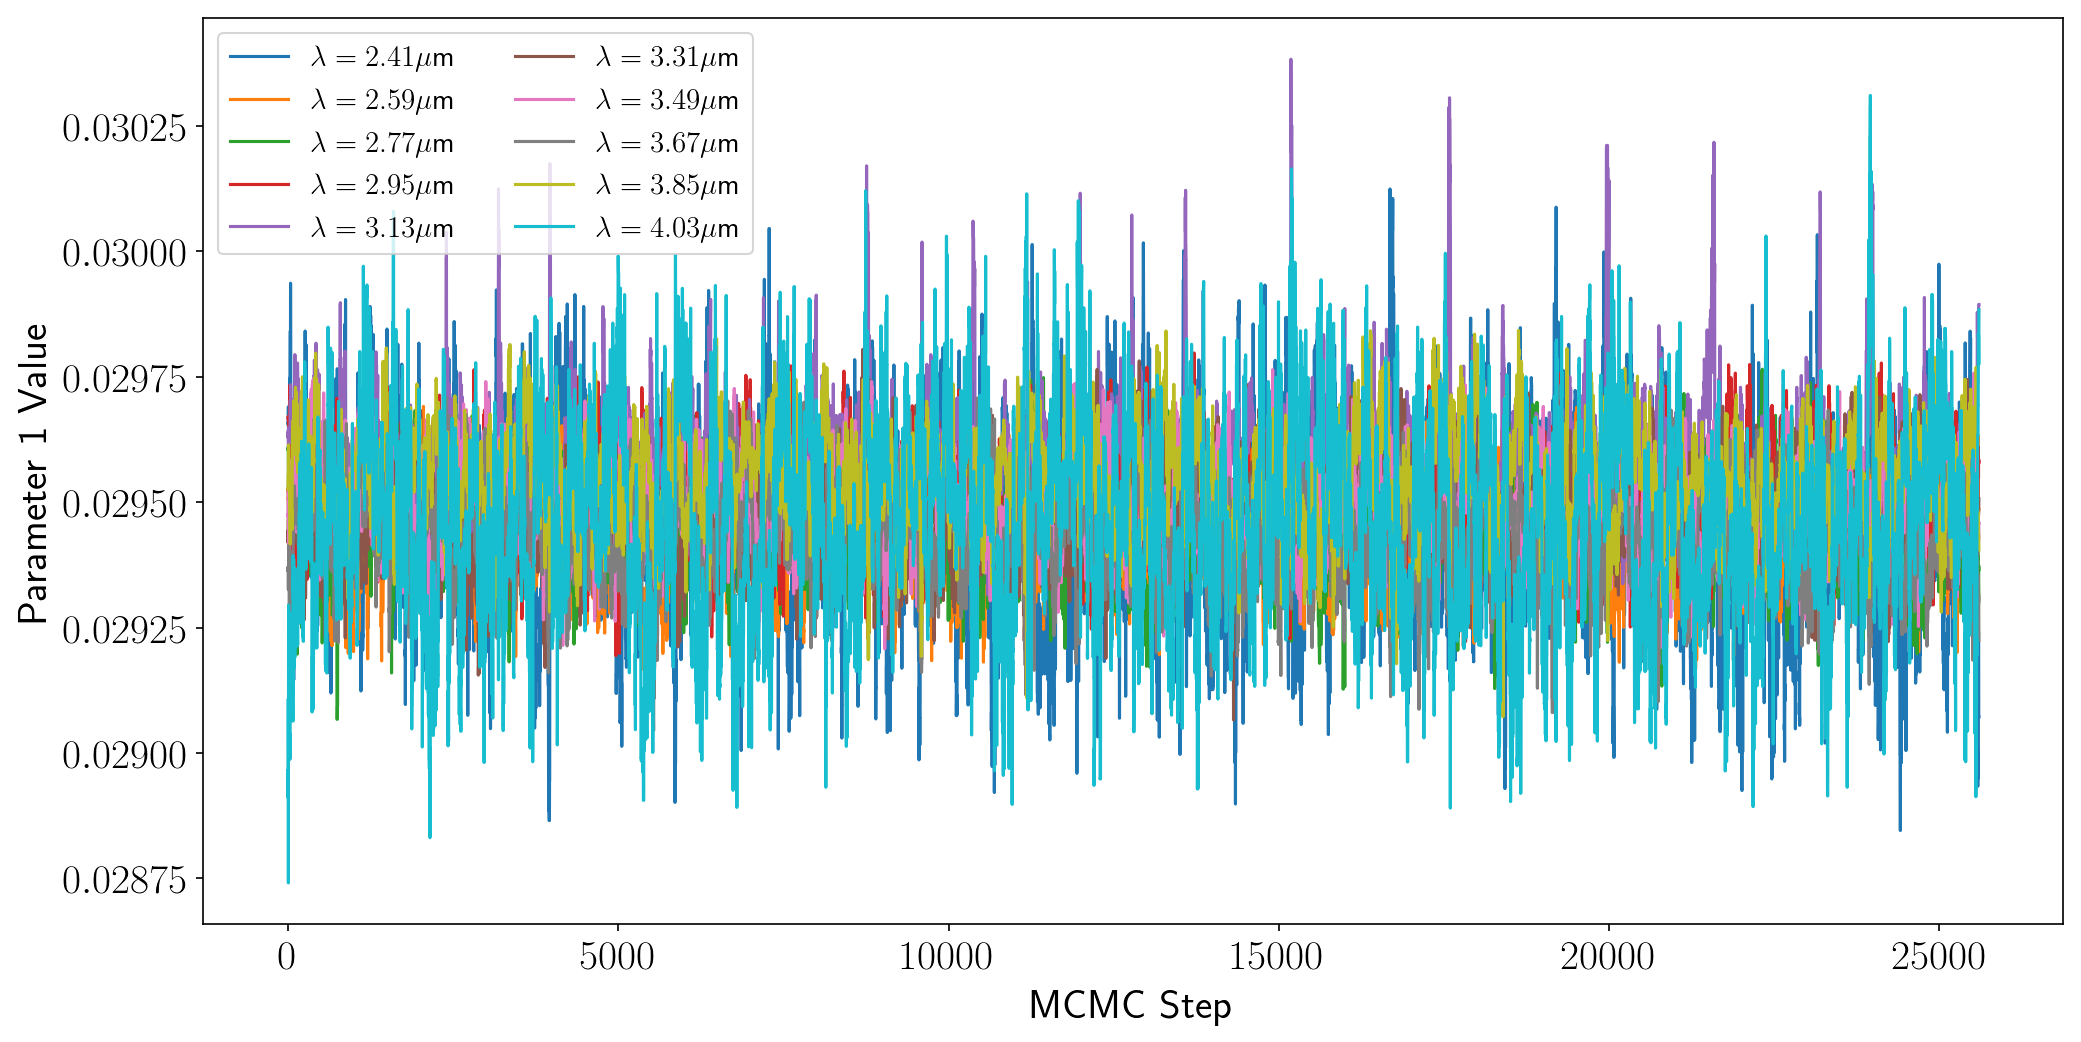

In [250]:
# Choose the jth parameter (spherical harmonic coeff)
j = 0

fig, ax = p.subplots(figsize = (16,8))
ax.set_xlabel("MCMC Step")
ax.set_ylabel("Parameter %i Value" %(j+1))

# Loop over wavelength, plotting
for i in range(len(wl))[:]:
    ax.plot(sph[:,j,i], label = "$\lambda = %.2f \mu$m" %wl[i])

# Make legend
ax.legend(fontsize = 14, ncol = 2)

# Save figure
fig.savefig(output_file.split(".")[0]+"_mcmc_trace1", bbox_inches = "tight")

# Corner plot

Make a corner plot of the MCMC marginal posteriors and parameter covariances. This will loop over wavelength and create a corner plot for each. These plots can be stitched together via the following command line function: `convert -delay 25 spherearray_deg_2_mcmc_wl* spherearray_deg_2_mcmc.gif`

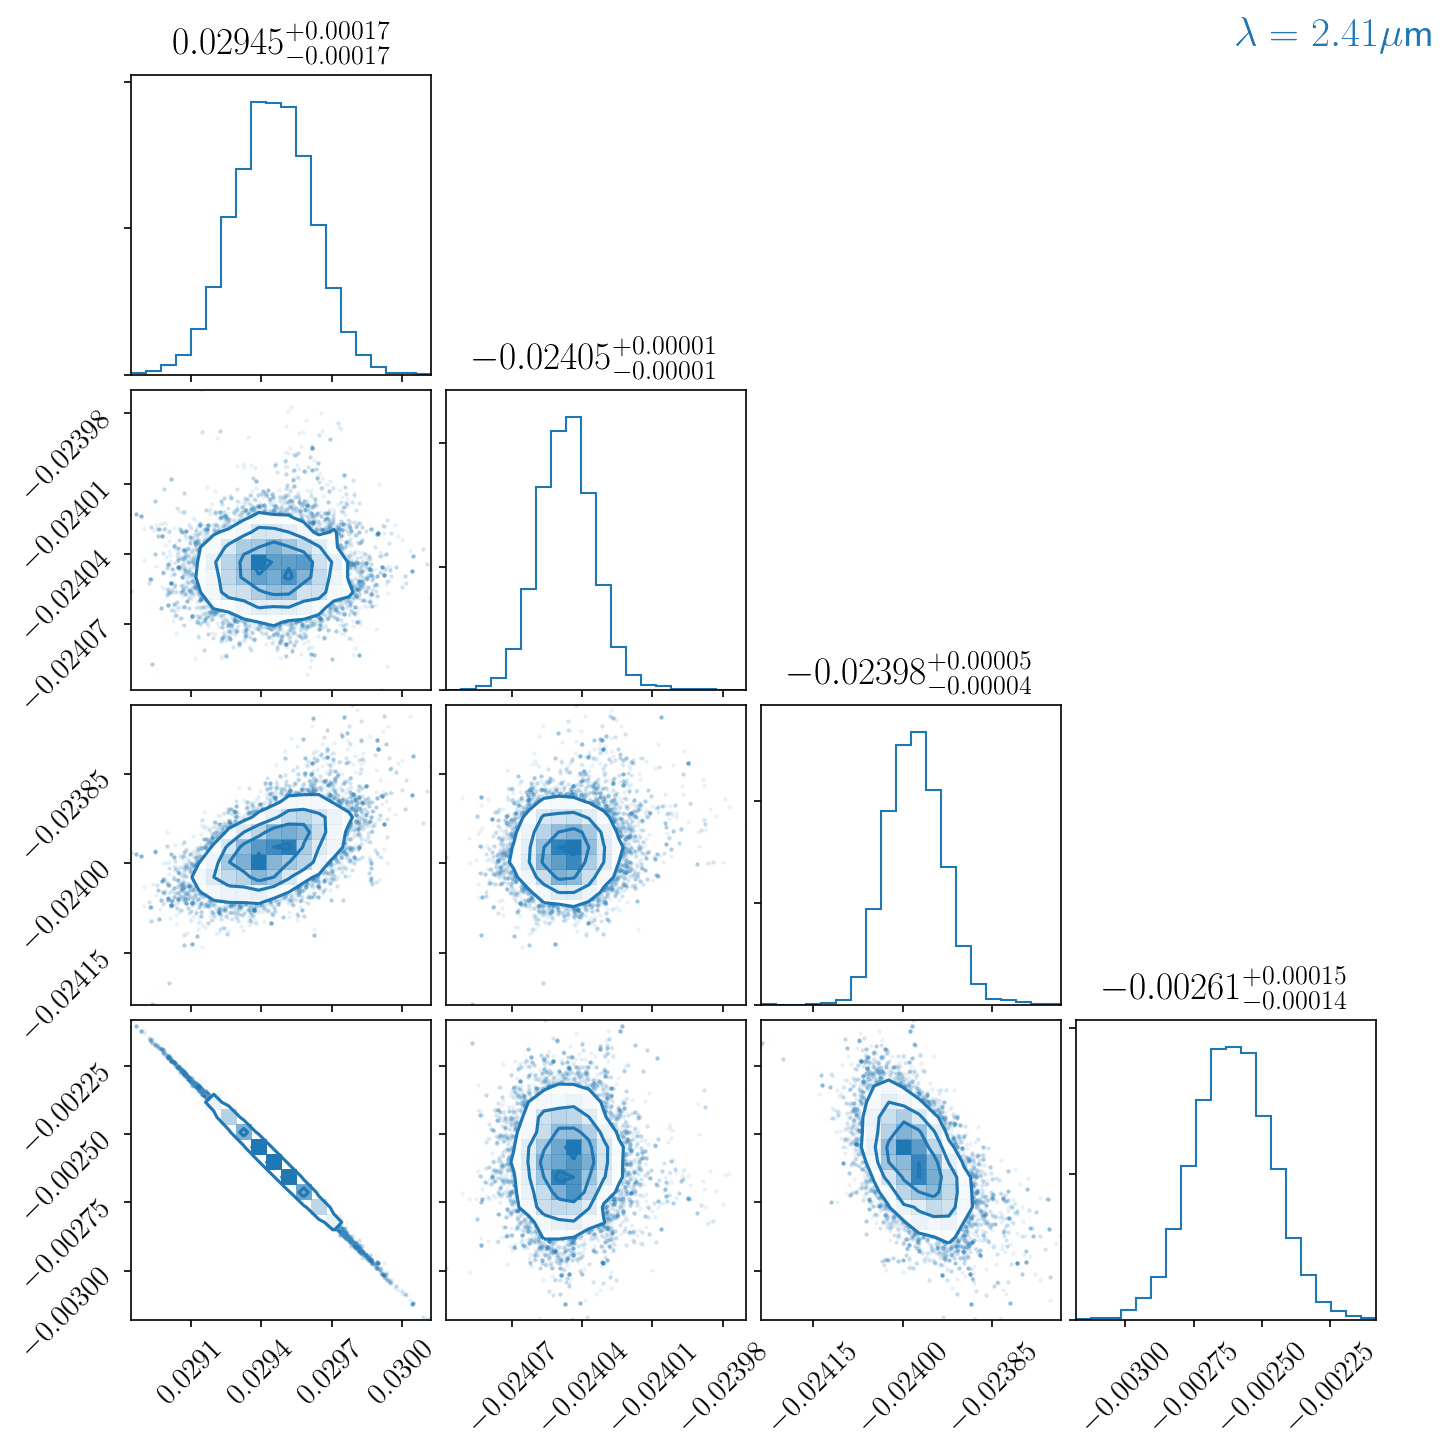

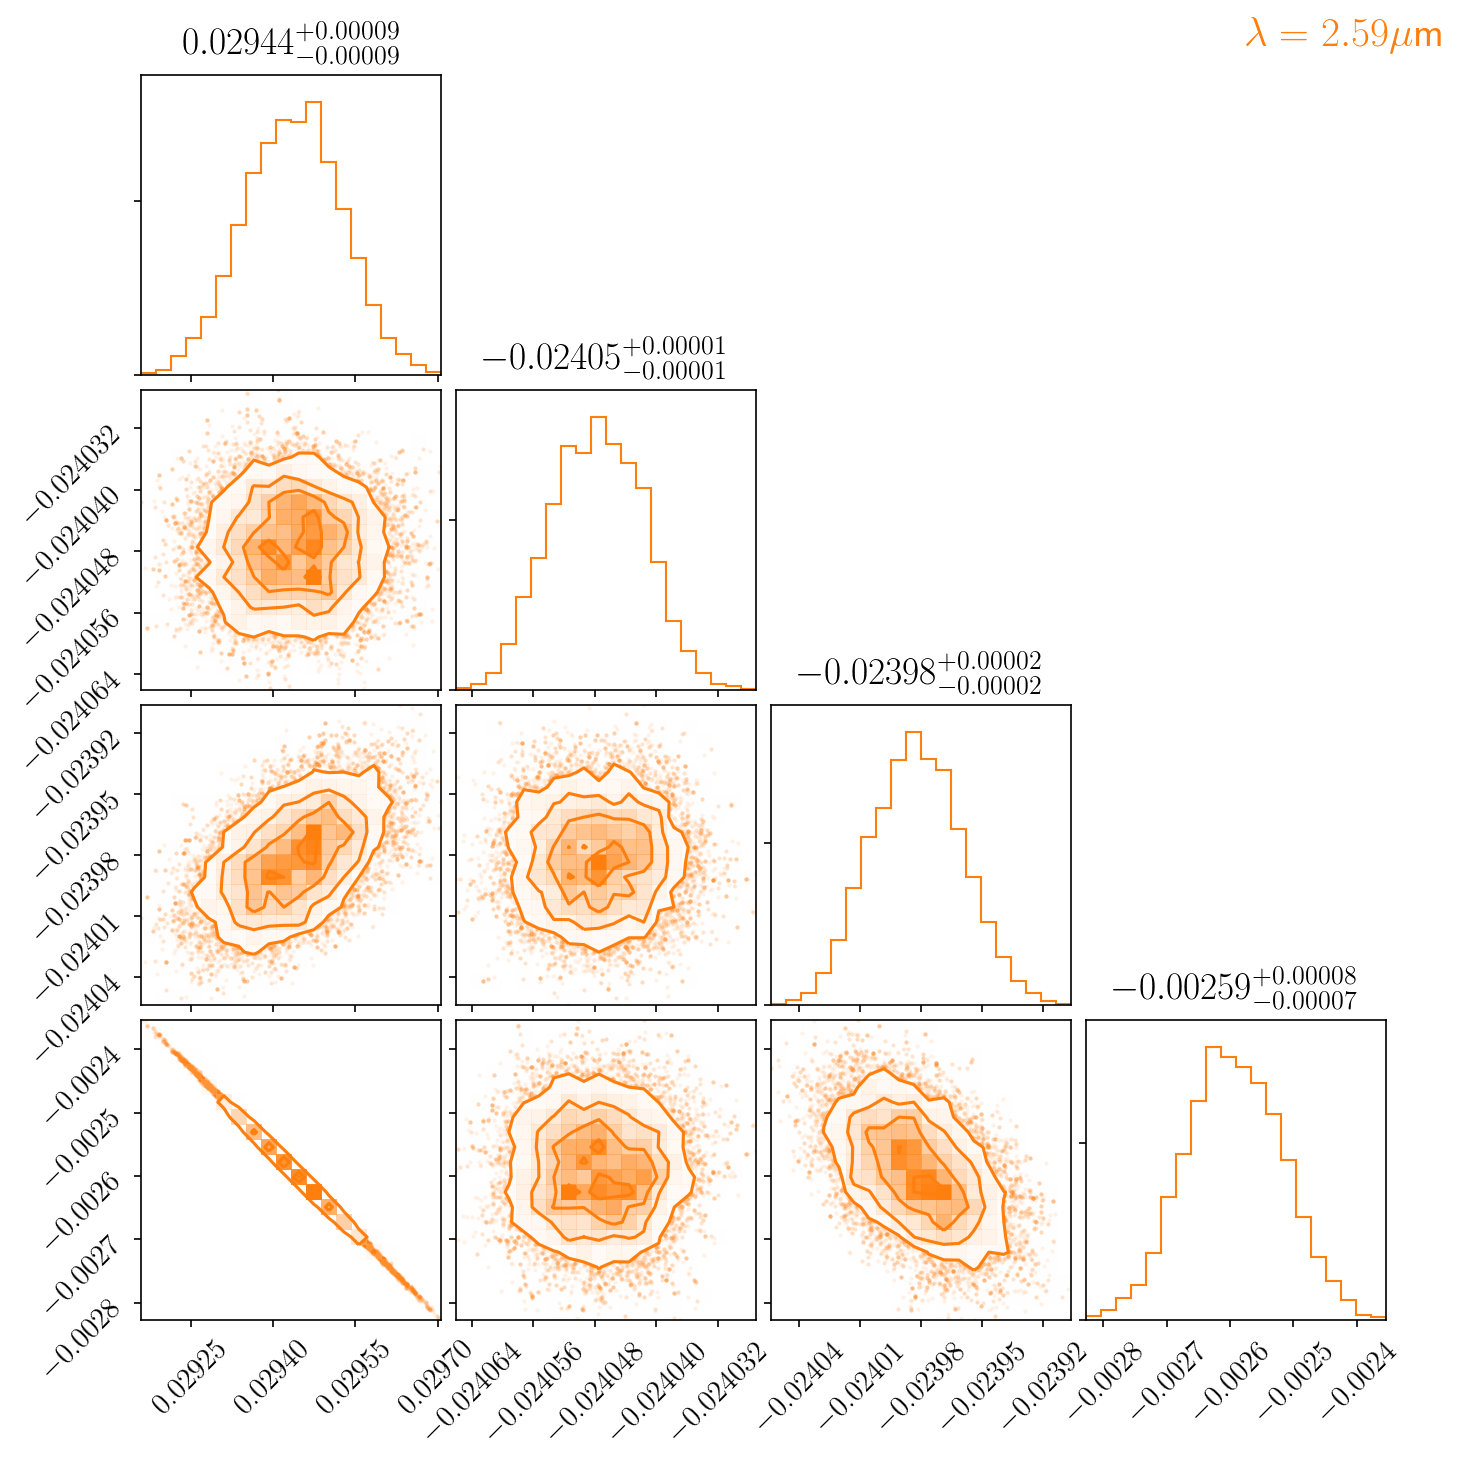

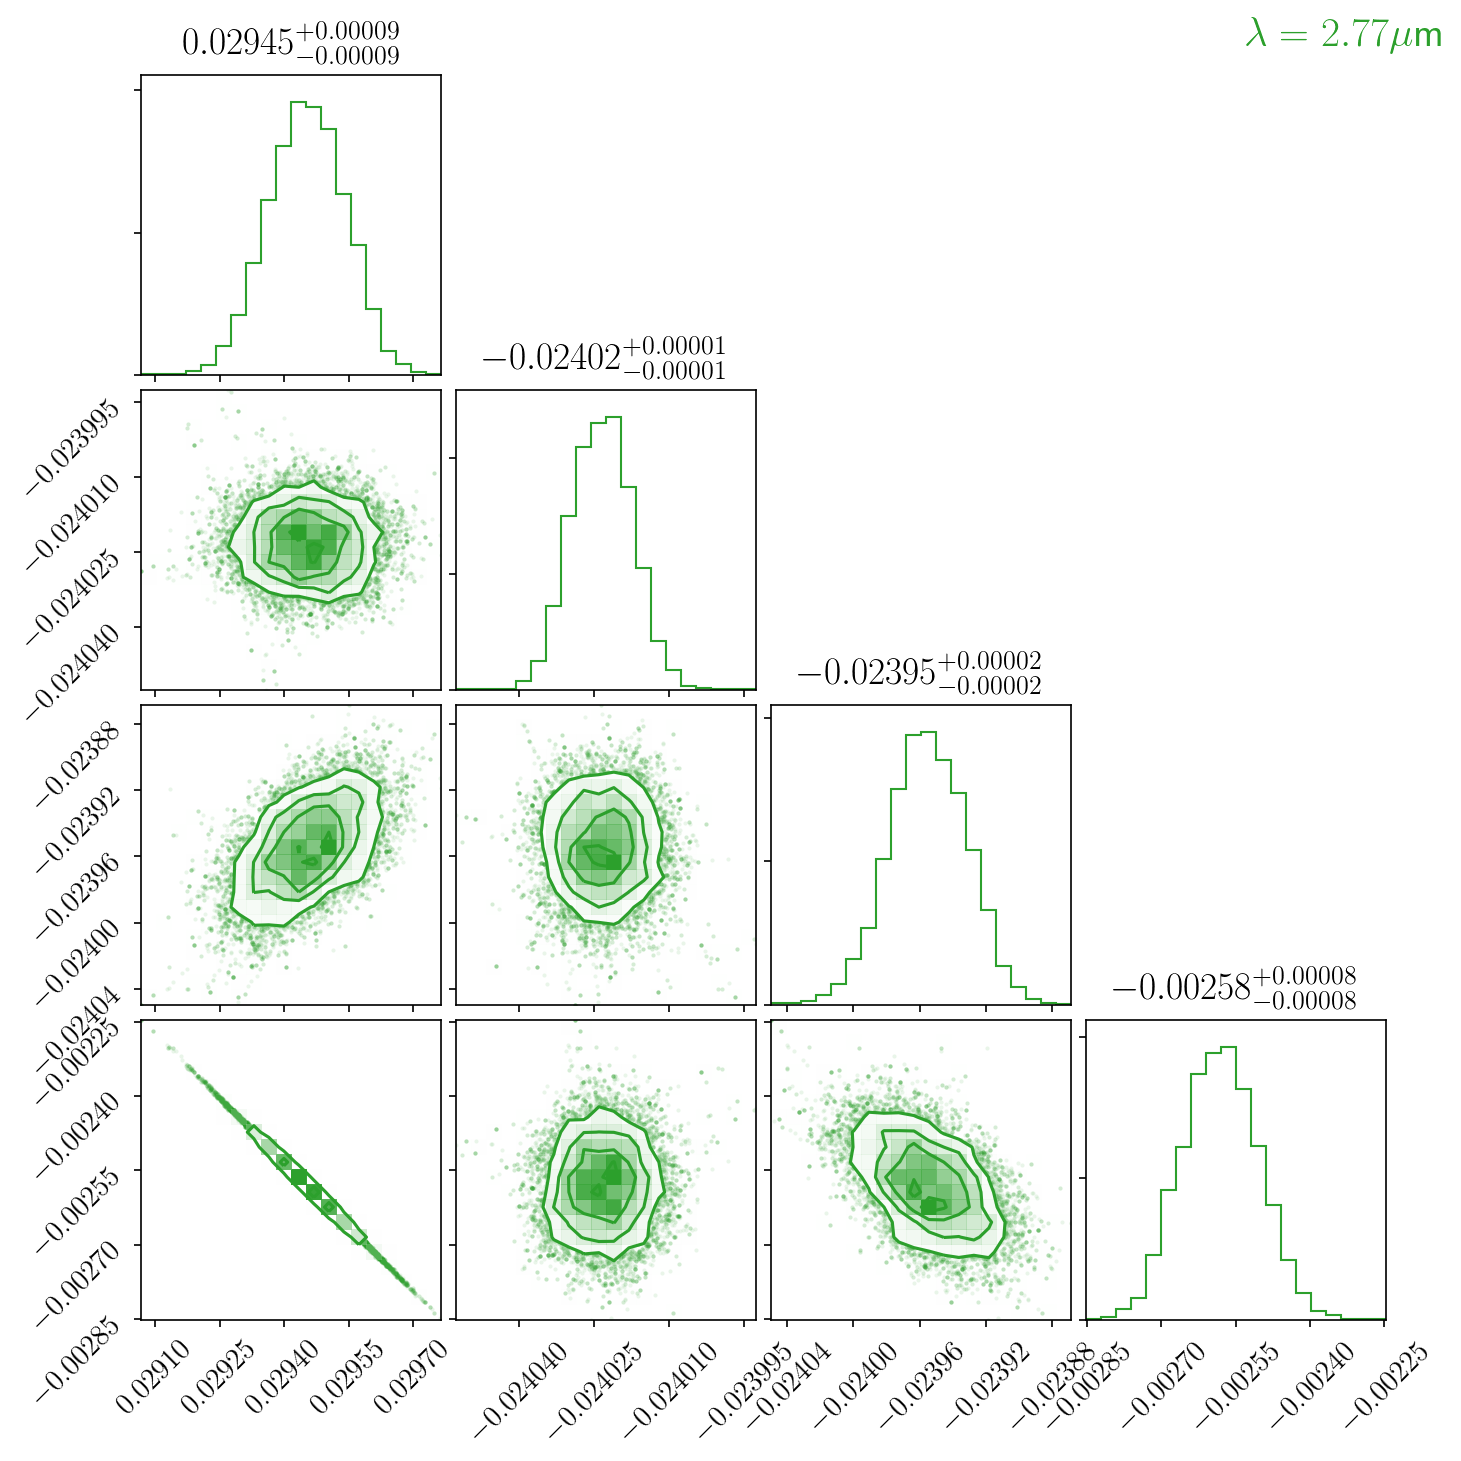

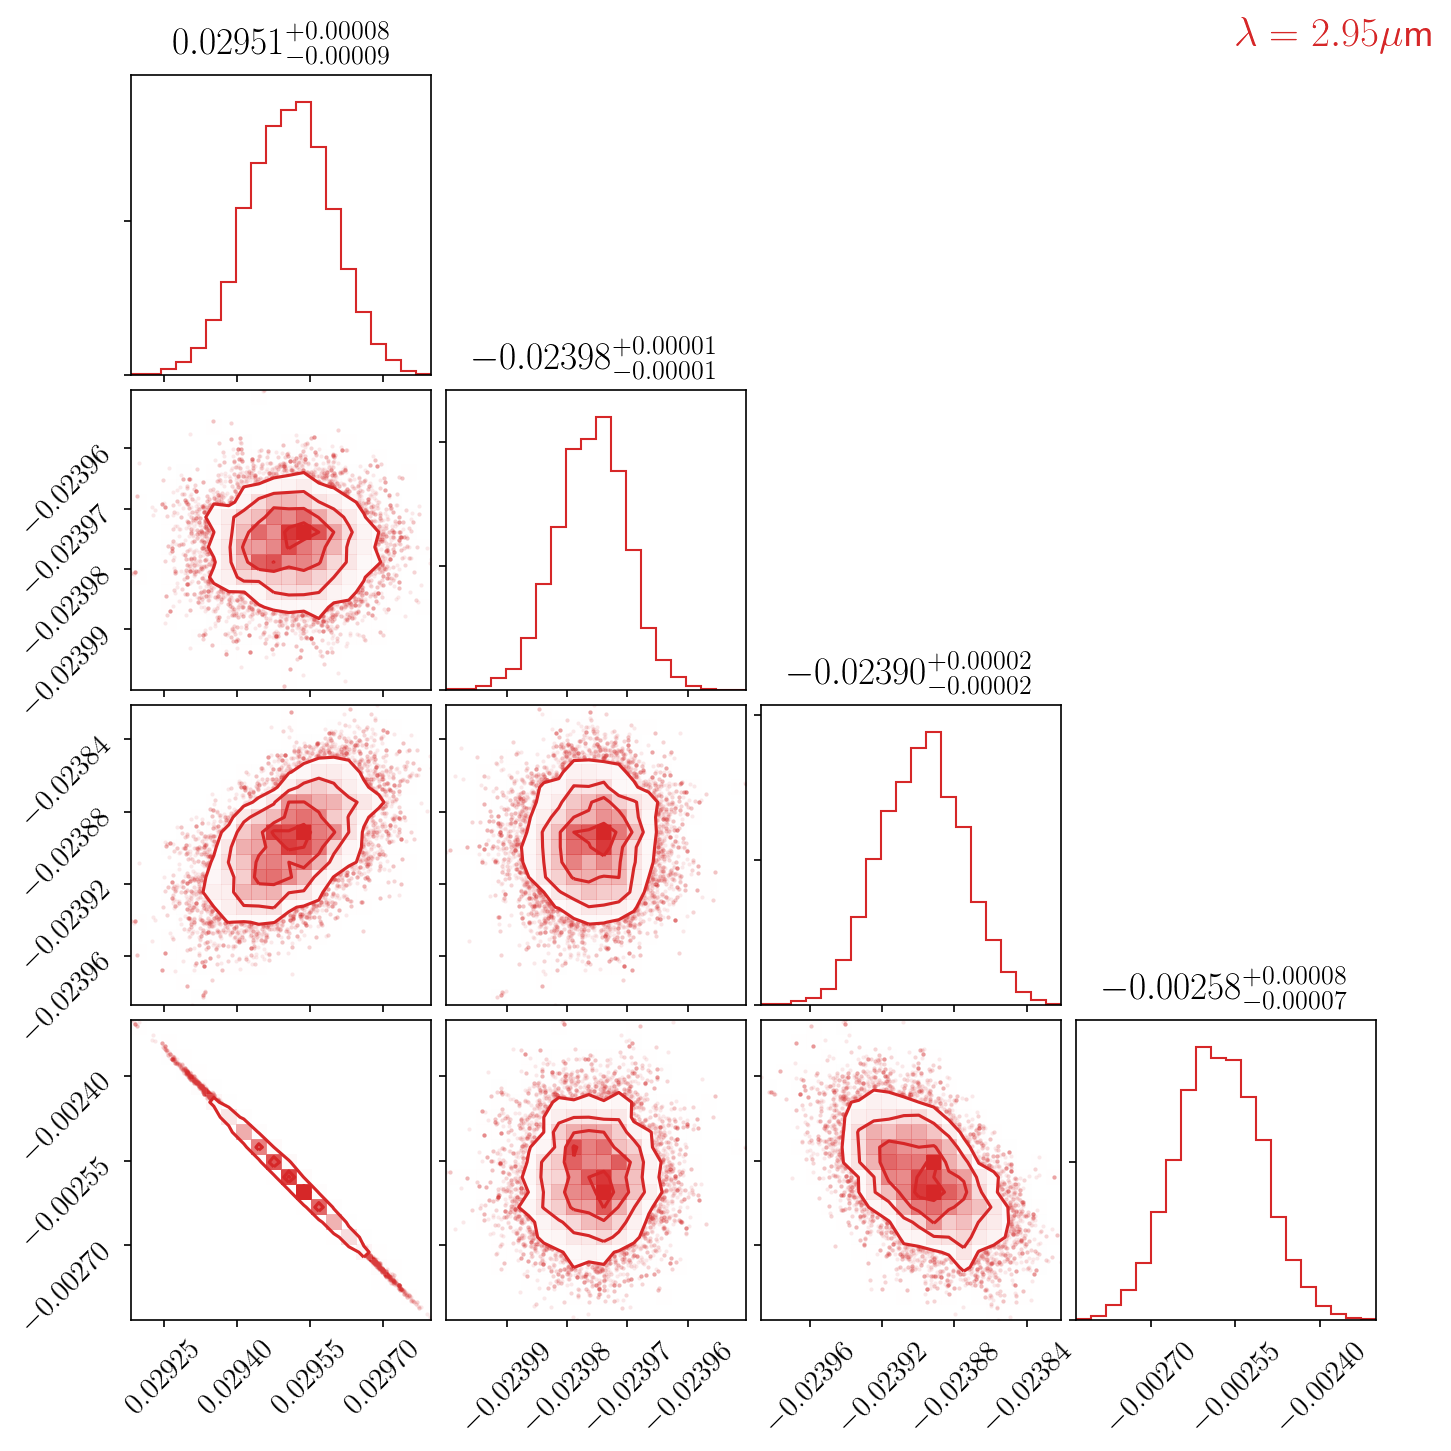

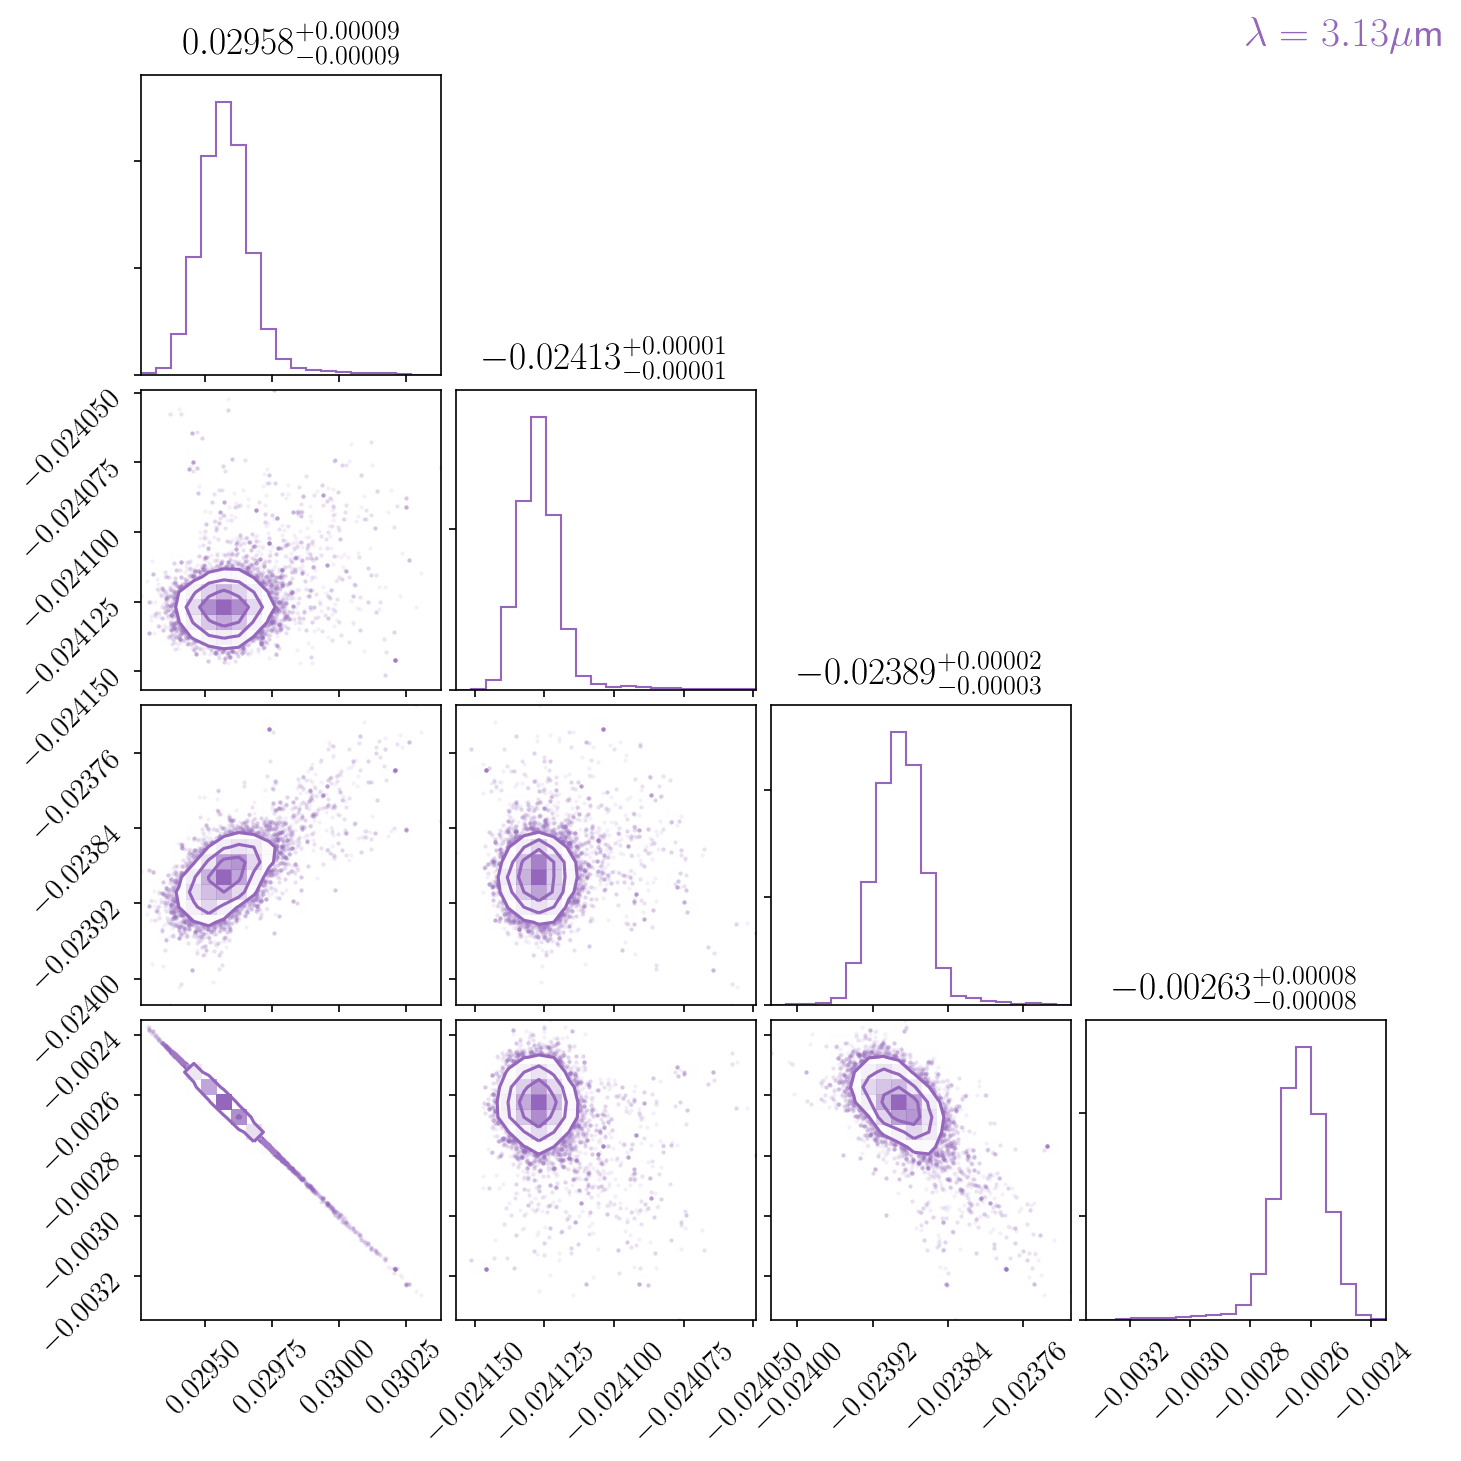

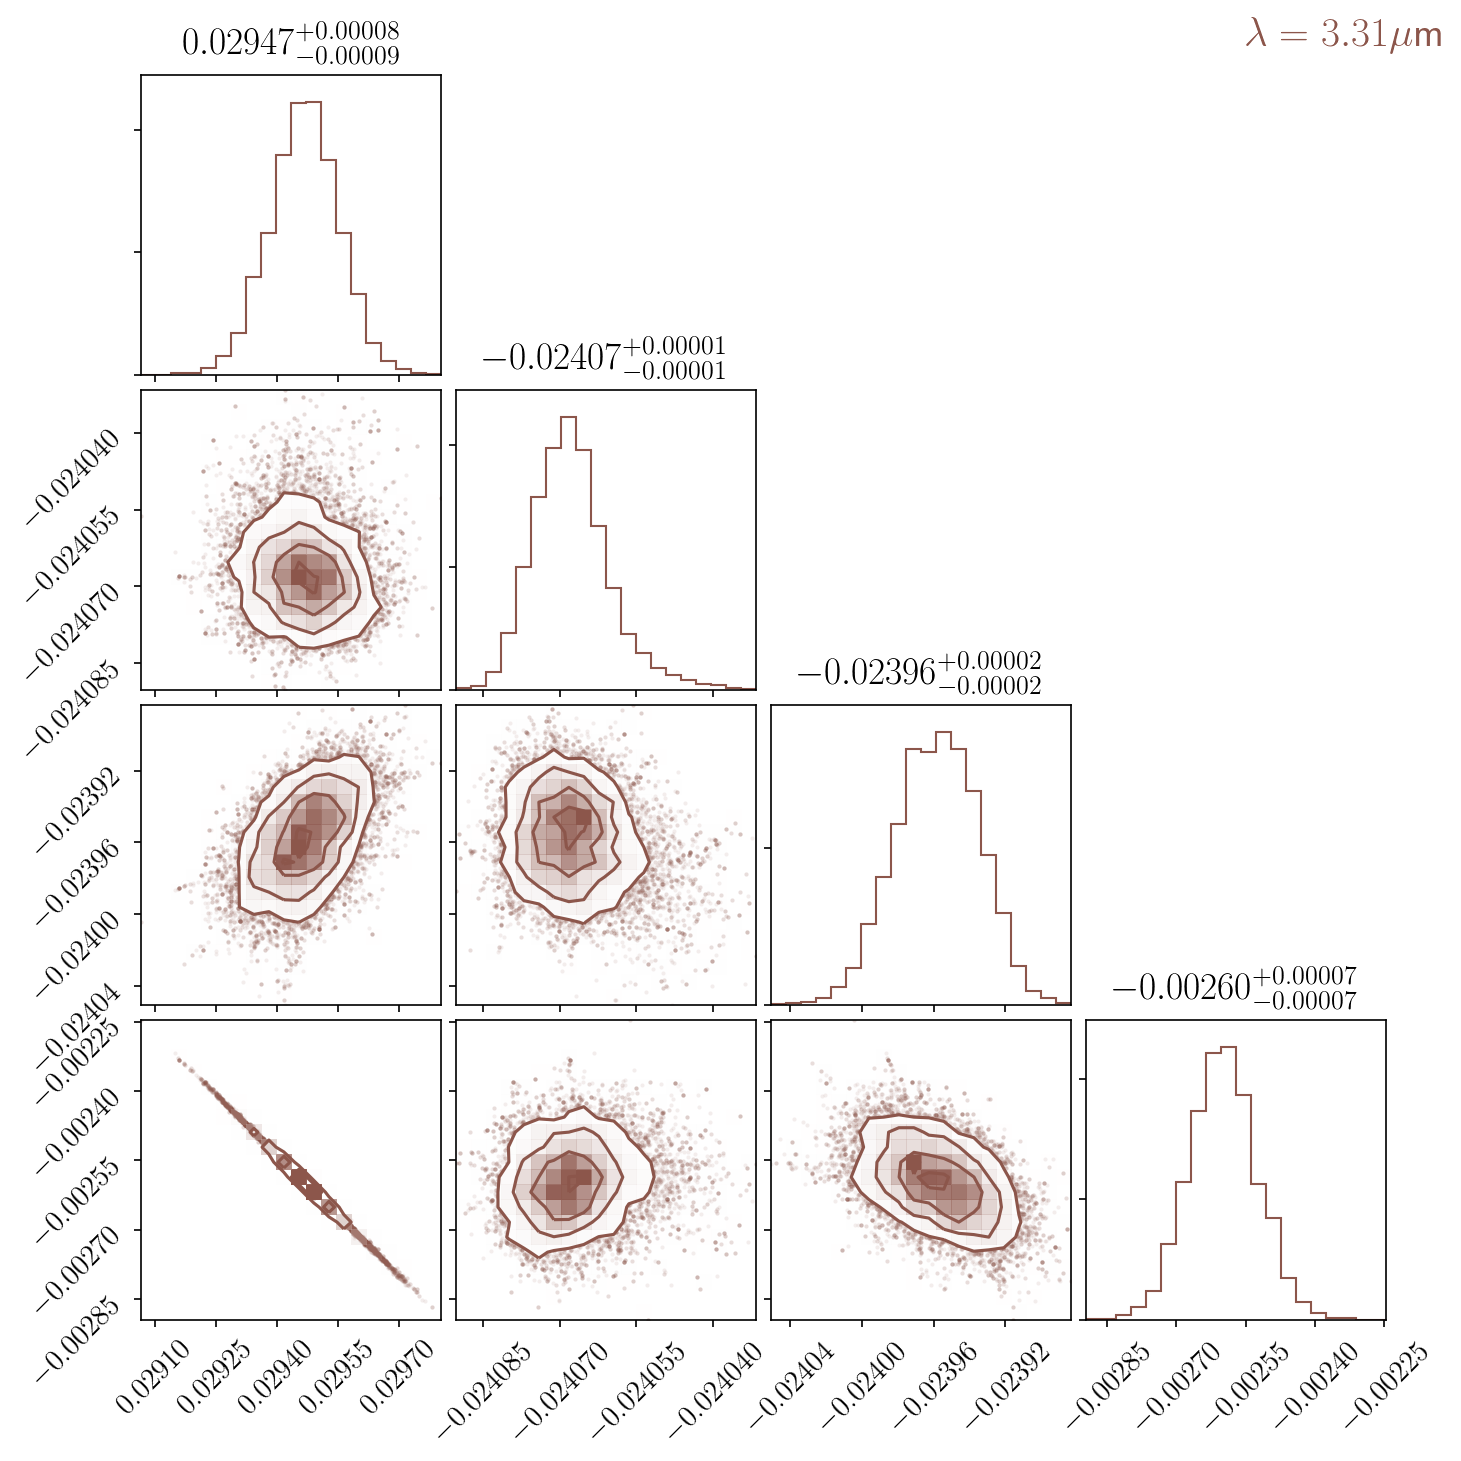

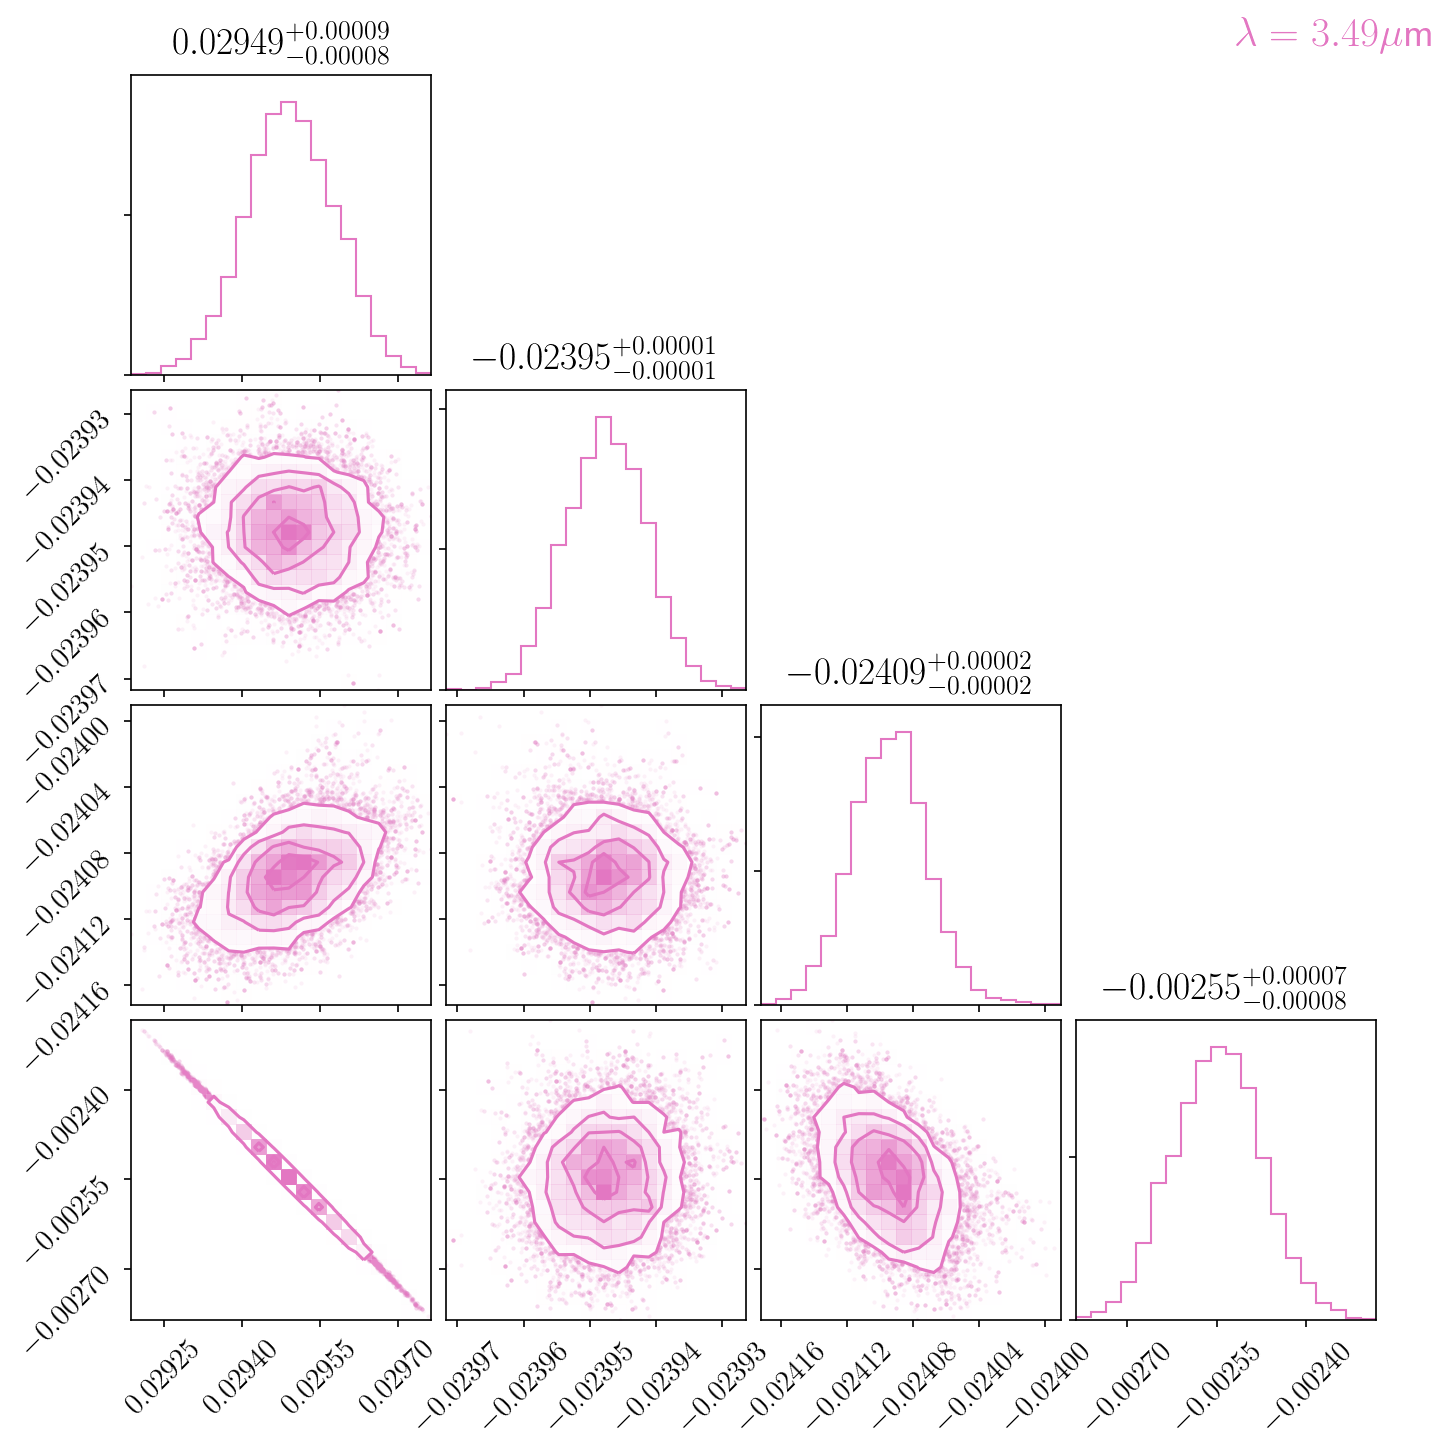

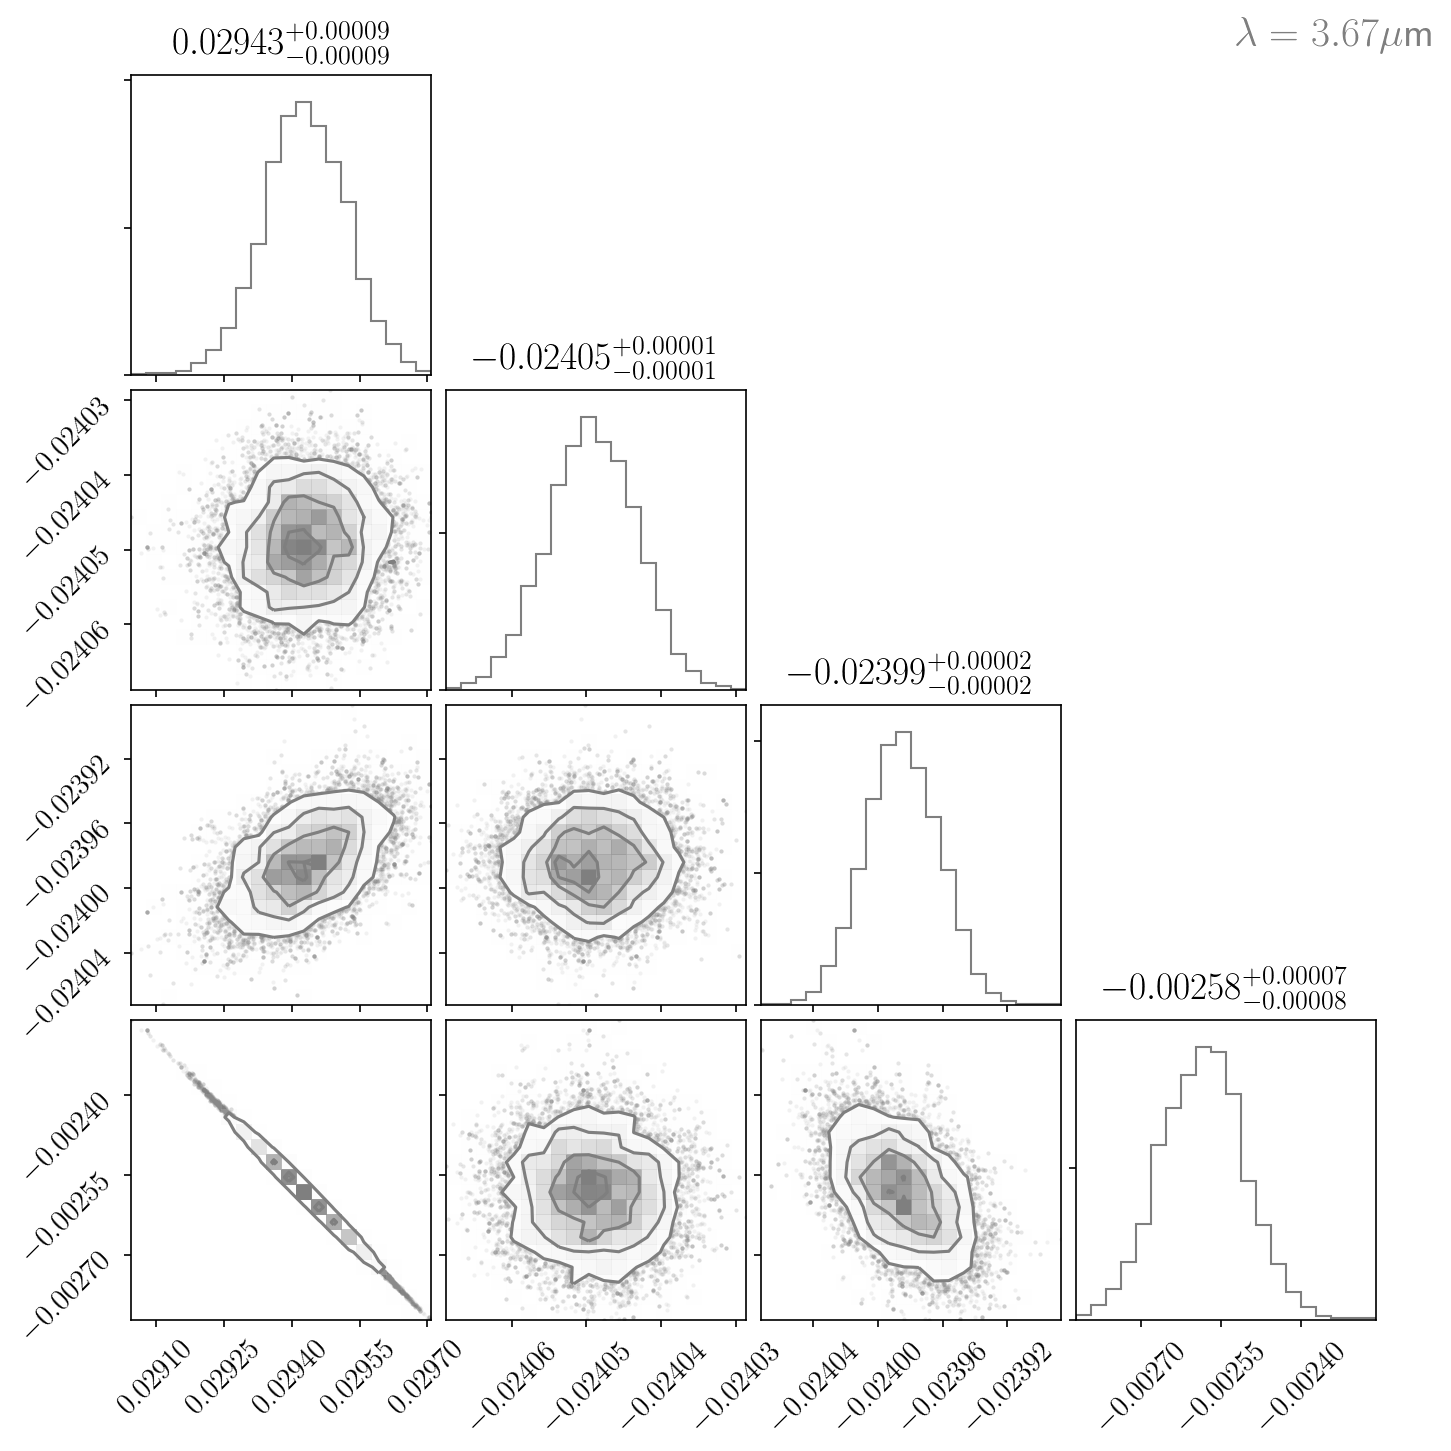

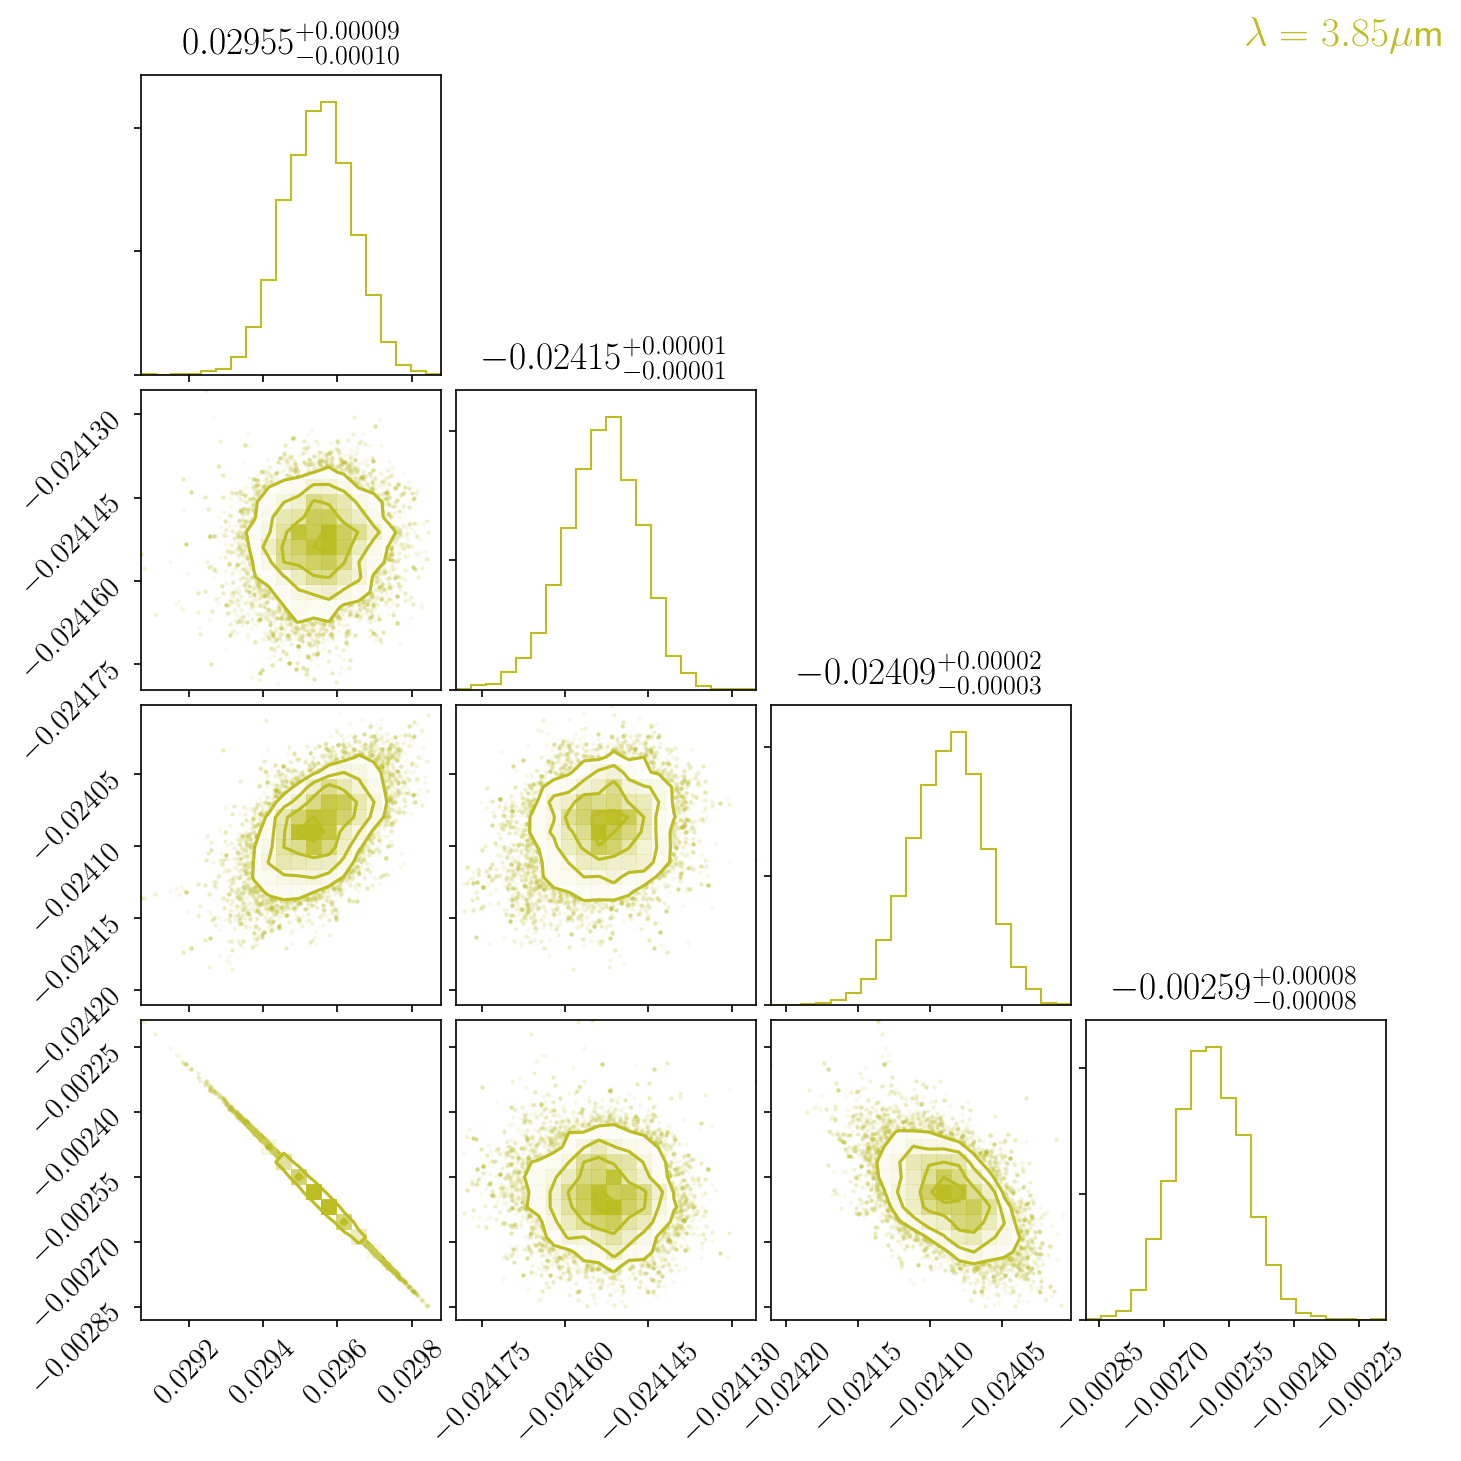

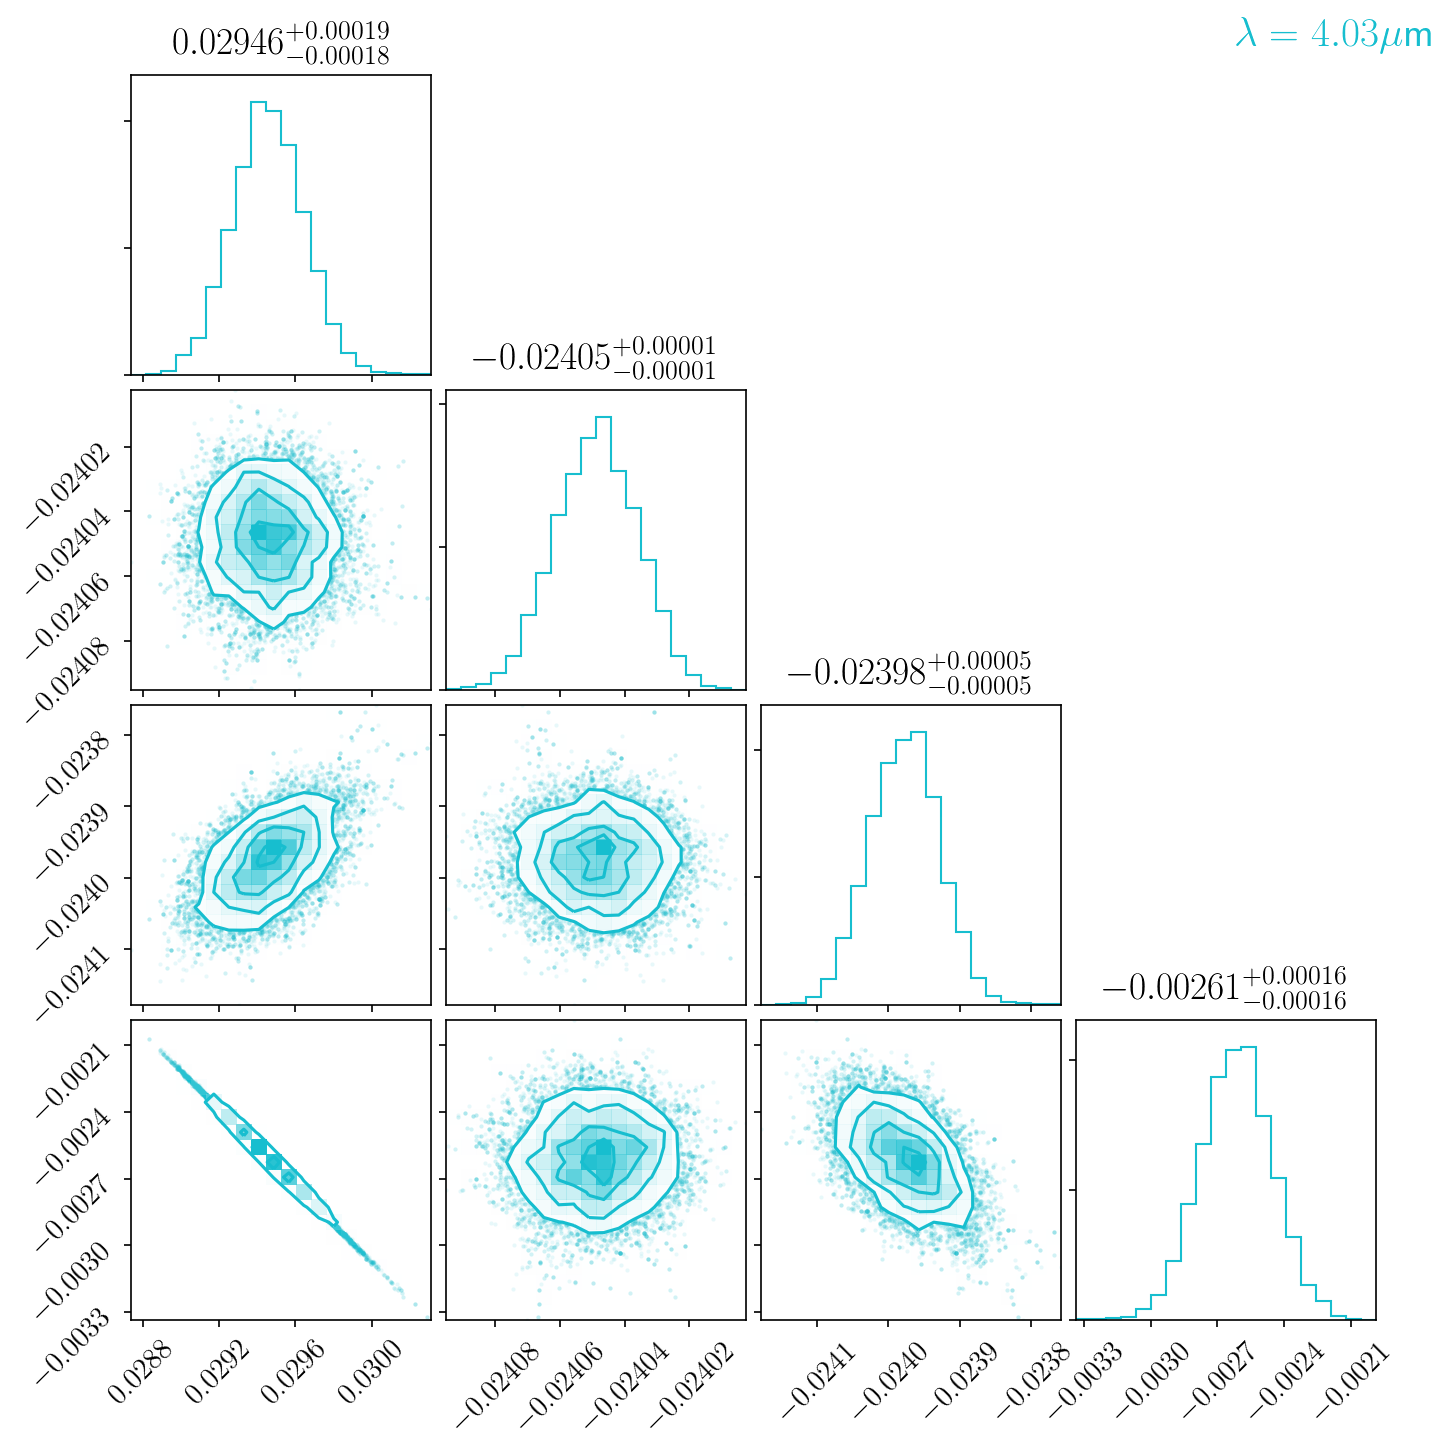

In [251]:
# Loop over wavelength 
for i in range(len(wl)):
    
    # Set labels
    labels=["$x_{%i}$" %j for j in range(sph.shape[1])]
    labels = None
    
    # Set color
    color = "C%i" %(i%10)
    
    # Make corner plot for this wavelength
    fig = corner.corner(sph[:,:,i], color = color, show_titles=True, labels = labels, 
                        title_fmt='.5f')
    
    # Adjust tick labels
    for ax in fig.axes:
        ax.xaxis.label.set_fontsize(18)
        ax.yaxis.label.set_fontsize(18)
        ax.title.set_fontsize(18)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(14)
    
    # Add wavelength text 
    fig.text(1.0,1.0, "$\lambda = %.2f \mu$m" %wl[i], color = color, va = "top", ha = "right")
    
    # Save figure
    fig.savefig(output_file.split(".")[0]+"_mcmc_wl%i" %i, bbox_inches = "tight")
    